<a href="https://colab.research.google.com/github/lorenzo1285/Macro/blob/main/Analisis_Macro_Cuentacorriente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
sns.set_style('whitegrid')

In [ ]:
df = pd.read_excel('balanza+pib (1).xlsx')
df

,Trimestre,cor_Ingresos,cor_Egresos,Importaciones,Exportaciones,cap_credito,cap_debito,inversion_directa,inversion_cartera,pib
0,Q4-2019,137466.8,134269.6,113756.613,116969.891,41.6,52.1,-1823.0,1997.7,-1.1
1,Q1-2020,128154.9,135681.4,104799.813,108522.241,86.1,96.7,-16064.2,-2431.6,-1.0
2,Q2-2020,88785.9,89223.0,75594.403,74531.045,47.2,52.3,-2214.3,7224.0,-16.8
3,Q3-2020,127218.6,110093.3,94889.572,111188.715,62.1,69.1,-2278.8,2231.2,12.4
4,Q4-2020,140006.6,122597.8,107910.065,123428.294,46.8,54.7,-1994.0,3719.7,3.3


In [ ]:
df.set_index('Trimestre', inplace=True)
df

,cor_Ingresos,cor_Egresos,Importaciones,Exportaciones,cap_credito,cap_debito,inversion_directa,inversion_cartera,pib
Trimestre,,,,,,,,,
Q4-2019,137466.8,134269.6,113756.613,116969.891,41.6,52.1,-1823.0,1997.7,-1.1
Q1-2020,128154.9,135681.4,104799.813,108522.241,86.1,96.7,-16064.2,-2431.6,-1.0
Q2-2020,88785.9,89223.0,75594.403,74531.045,47.2,52.3,-2214.3,7224.0,-16.8
Q3-2020,127218.6,110093.3,94889.572,111188.715,62.1,69.1,-2278.8,2231.2,12.4
Q4-2020,140006.6,122597.8,107910.065,123428.294,46.8,54.7,-1994.0,3719.7,3.3


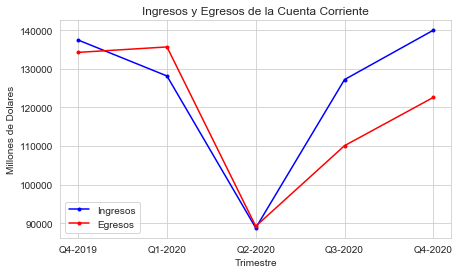

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Ingresos y Egresos de la Cuenta Corriente')

plt.xlabel('Trimestre')
plt.ylabel('Millones de Dolares')
plt.plot(df['cor_Ingresos'], 'b.-', label='Ingresos')
plt.plot(df['cor_Egresos'], 'r.-', label='Egresos')
plt.legend()
plt.show()

In [ ]:
df[['cor_Ingresos','cor_Egresos']]

,cor_Ingresos,cor_Egresos
Trimestre,,
Q4-2019,137466.8,134269.6
Q1-2020,128154.9,135681.4
Q2-2020,88785.9,89223.0
Q3-2020,127218.6,110093.3
Q4-2020,140006.6,122597.8


In [ ]:
df.corr()

,cor_Ingresos,cor_Egresos,Importaciones,Exportaciones,cap_credito,cap_debito,inversion_directa,inversion_cartera,pib
cor_Ingresos,1.000000,0.849691,0.952041,0.994851,0.075059,0.160979,-0.086336,-0.609104,0.763374
cor_Egresos,0.849691,1.000000,0.943592,0.795540,0.328897,0.432347,-0.480563,-0.833018,0.448928
Importaciones,0.952041,0.943592,1.000000,0.919742,0.054981,0.159622,-0.179333,-0.647056,0.554768
Exportaciones,0.994851,0.795540,0.919742,1.000000,0.045576,0.124157,-0.031106,-0.555839,0.795381
cap_credito,0.075059,0.328897,0.054981,0.045576,1.000000,0.993356,-0.915857,-0.777456,0.236920
cap_debito,0.160979,0.432347,0.159622,0.124157,0.993356,1.000000,-0.935954,-0.841775,0.263605
inversion_directa,-0.086336,-0.480563,-0.179333,-0.031106,-0.915857,-0.935954,1.000000,0.792545,0.018264
inversion_cartera,-0.609104,-0.833018,-0.647056,-0.555839,-0.777456,-0.841775,0.792545,1.000000,-0.496305
pib,0.763374,0.448928,0.554768,0.795381,0.236920,0.263605,0.018264,-0.496305,1.000000


In [ ]:
total_ing = df['cor_Ingresos'].sum(axis=0)
total_ing

621632.7999999999

In [ ]:
total_egr = df['cor_Egresos'].sum(axis=0)
total_egr

591865.1

In [ ]:
superavit = total_ing-total_egr
superavit

29767.699999999953

In [ ]:
df['cor_Saldo'] = df['cor_Ingresos']-df['cor_Egresos']
df['cor_Saldo'].to_frame()

,cor_Saldo
Trimestre,
Q4-2019,3197.2
Q1-2020,-7526.5
Q2-2020,-437.1
Q3-2020,17125.3
Q4-2020,17408.8


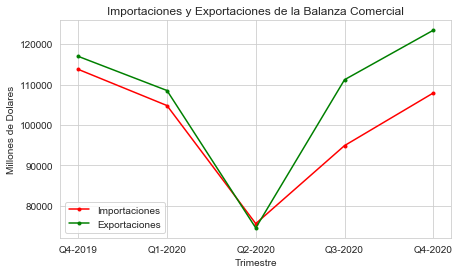

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Importaciones y Exportaciones de la Balanza Comercial')

plt.xlabel('Trimestre')
plt.ylabel('Millones de Dolares')
plt.plot(df['Importaciones'], 'r.-', label='Importaciones')
plt.plot(df['Exportaciones'], 'g.-', label='Exportaciones')
plt.legend()
plt.show()

In [ ]:
df[['Importaciones','Exportaciones',]]

,Importaciones,Exportaciones
Trimestre,,
Q4-2019,113756.613,116969.891
Q1-2020,104799.813,108522.241
Q2-2020,75594.403,74531.045
Q3-2020,94889.572,111188.715
Q4-2020,107910.065,123428.294


In [ ]:
df['Saldo_BC'] = df['Exportaciones'] - df['Importaciones']
df['Saldo_BC'].to_frame()

,Saldo_BC
Trimestre,
Q4-2019,3213.278
Q1-2020,3722.428
Q2-2020,-1063.358
Q3-2020,16299.143
Q4-2020,15518.229


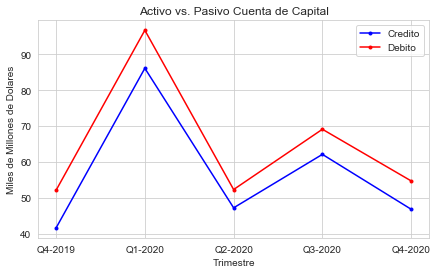

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Activo vs. Pasivo Cuenta de Capital')

plt.xlabel('Trimestre')
plt.ylabel('Miles de Millones de Dolares')
plt.plot(df['cap_credito'], 'b.-', label='Credito')
plt.plot(df['cap_debito'], 'r.-', label='Debito')
plt.legend()
plt.show()

In [ ]:
df['cap_saldo'] = df['cap_credito']-df['cap_debito']
df['cap_saldo'].to_frame()

,cap_saldo
Trimestre,
Q4-2019,-10.5
Q1-2020,-10.6
Q2-2020,-5.1
Q3-2020,-7.0
Q4-2020,-7.9


In [ ]:
df[['cap_credito','cap_debito']]

,cap_credito,cap_debito
Trimestre,,
Q4-2019,41.6,52.1
Q1-2020,86.1,96.7
Q2-2020,47.2,52.3
Q3-2020,62.1,69.1
Q4-2020,46.8,54.7


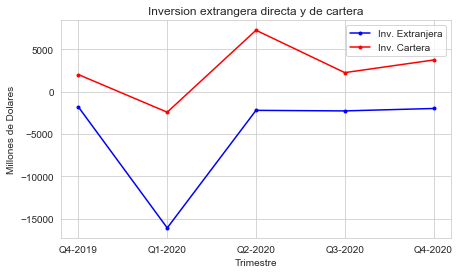

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Inversion extrangera directa y de cartera')

plt.xlabel('Trimestre')
plt.ylabel('Millones de Dolares')
plt.plot(df['inversion_directa'], 'b.-', label='Inv. Extranjera')
plt.plot(df['inversion_cartera'], 'r.-', label='Inv. Cartera')
plt.legend()
plt.show()

In [ ]:
df[['inversion_directa','inversion_cartera']]

,inversion_directa,inversion_cartera
Trimestre,,
Q4-2019,-1823.0,1997.7
Q1-2020,-16064.2,-2431.6
Q2-2020,-2214.3,7224.0
Q3-2020,-2278.8,2231.2
Q4-2020,-1994.0,3719.7


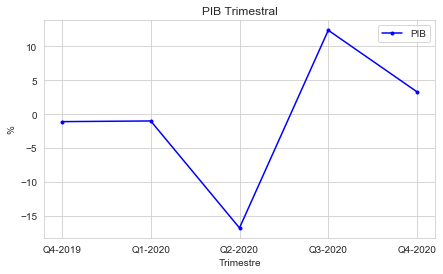

In [ ]:
plt.figure(figsize=(7,4))
plt.title('PIB Trimestral')

plt.xlabel('Trimestre')
plt.ylabel('%')
plt.plot(df['pib'], 'b.-', label='PIB')
plt.legend()
plt.show()

In [ ]:
df.pib.to_frame()

,pib
Trimestre,
Q4-2019,-1.1
Q1-2020,-1.0
Q2-2020,-16.8
Q3-2020,12.4
Q4-2020,3.3


In [ ]:
df.to_csv('AnalisisMacro')